# Logistics Shipments Analysis

This notebook analyzes delayed shipments in a logistics dataset.
It identifies which warehouses and carriers contribute most to delays,
and examines the impact of delays on average transit days.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv("logistics_shipments_dataset.csv")
df = df.dropna(subset=["Delivery_Date", "Cost"])

df["is_delayed"] = df["Status"] == "Delayed"
df["is_lost"] = df["Status"] == "Lost"

is_delayed = df[df["is_delayed"]]
is_lost = df[df["is_lost"]]

delays_by_warehouse = is_delayed["Origin_Warehouse"].value_counts().sort_values(ascending=True)
delays_by_carrier = is_delayed["Carrier"].value_counts().sort_values(ascending=True)
lost_by_carrier = is_lost["Carrier"].value_counts().sort_values(ascending=True)

avg_transit = df.groupby("is_delayed")["Transit_Days"].mean()
avg_transit = avg_transit.rename(index={False: "On-time", True: "Delayed"})

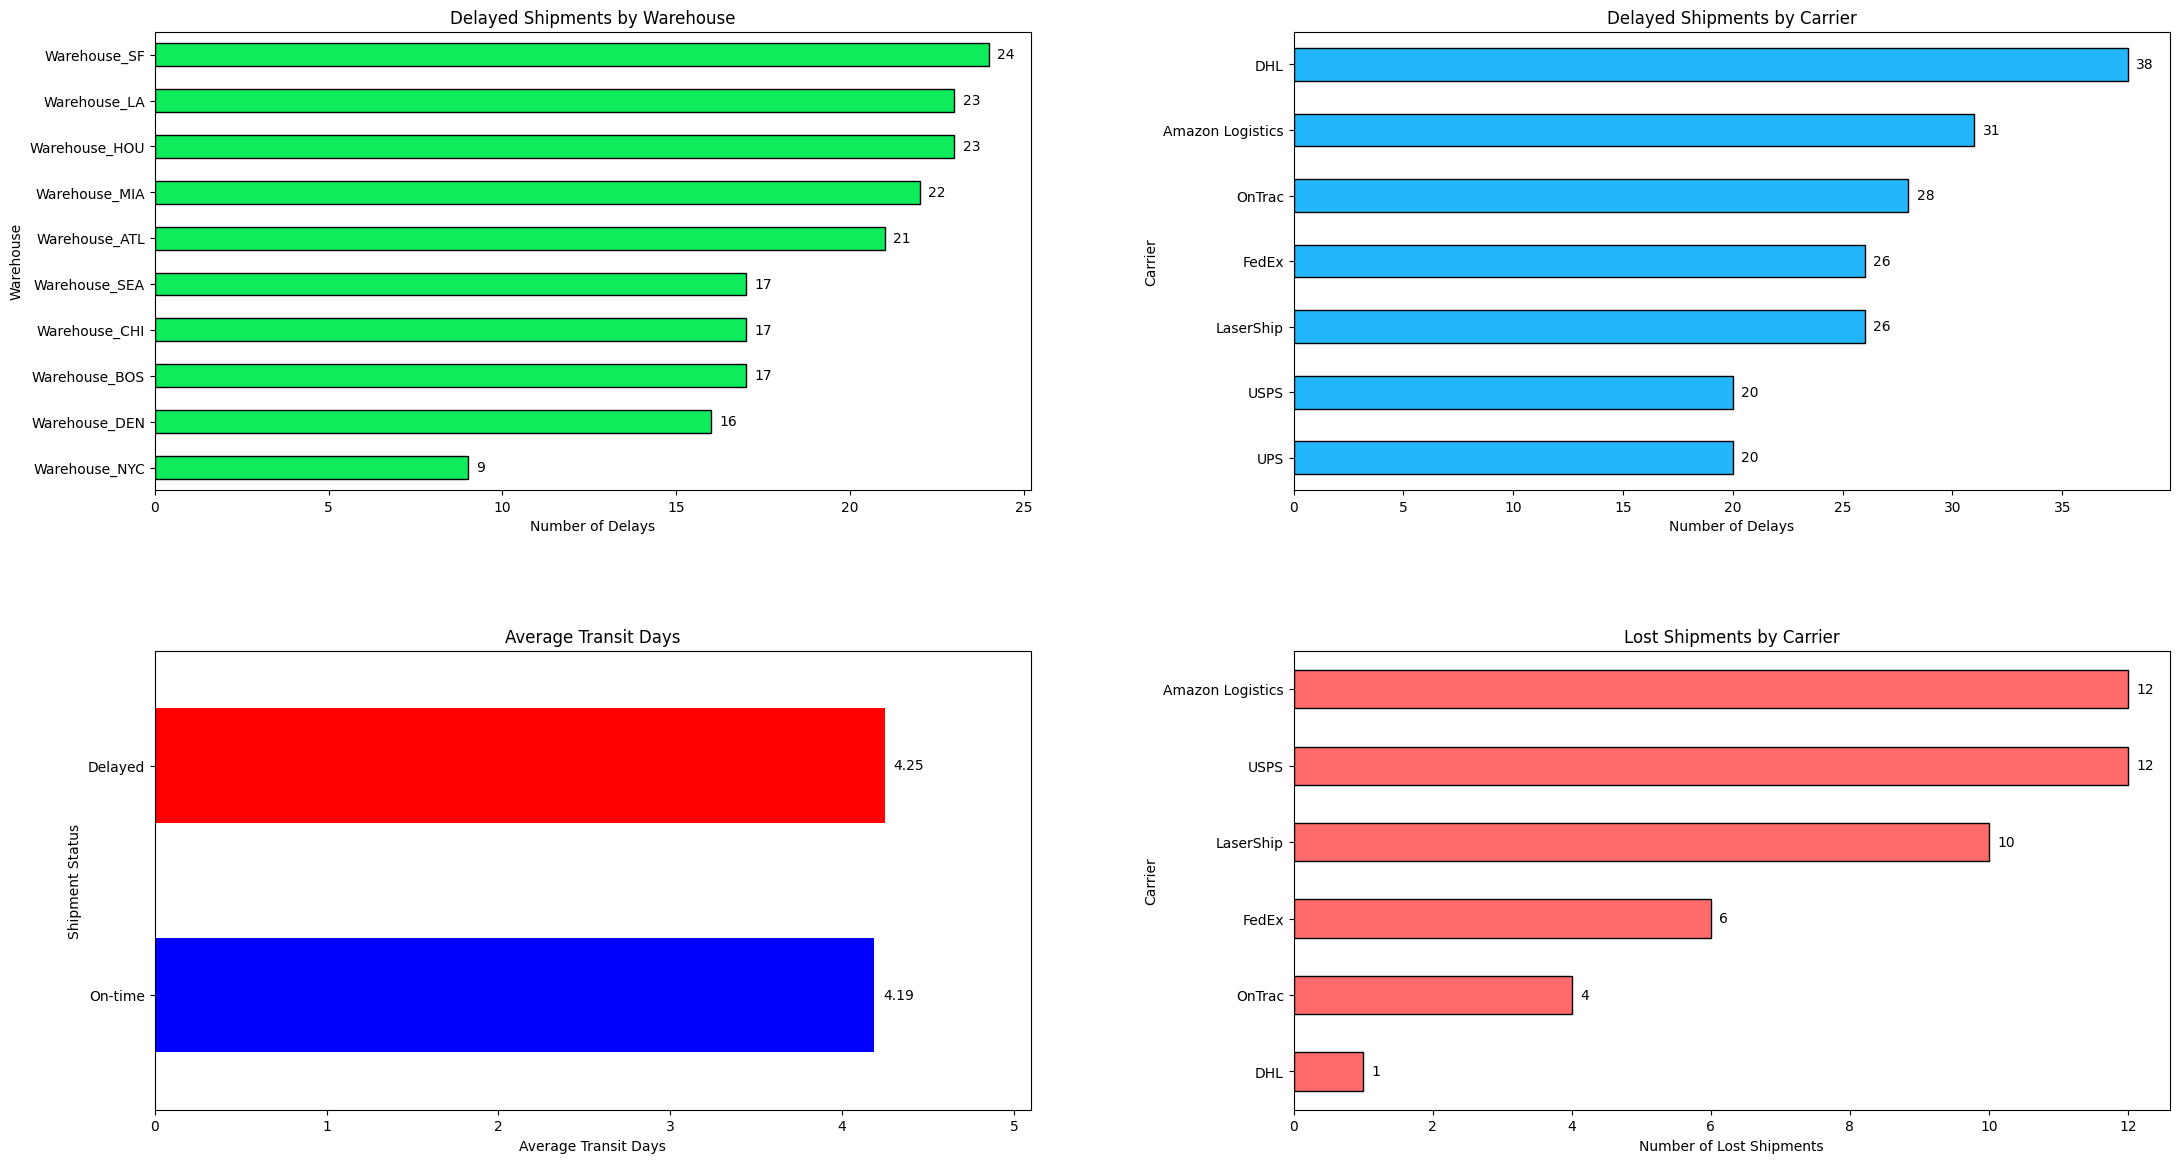

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(26, 14))
axes = axes.flatten()  
plt.subplots_adjust(hspace=0.35, wspace=0.3)

delays_by_warehouse.plot(
    kind="barh", color="#0eeb5b", edgecolor="black", ax=axes[0]
)
axes[0].set_xlabel("Number of Delays")
axes[0].set_ylabel("Warehouse")
axes[0].set_title("Delayed Shipments by Warehouse")

for i, v in enumerate(delays_by_warehouse):
    axes[0].text(v + max(delays_by_warehouse)*0.01, i, str(v), va='center', fontsize=10)

delays_by_carrier.plot(
    kind="barh", color="#23b6fa", edgecolor="black", ax=axes[1]
)
axes[1].set_xlabel("Number of Delays")
axes[1].set_ylabel("Carrier")
axes[1].set_title("Delayed Shipments by Carrier")

for i, v in enumerate(delays_by_carrier):
    axes[1].text(v + max(delays_by_carrier)*0.01, i, str(v), va='center', fontsize=10)

avg_transit.plot(
    kind="barh", color=["blue","red"], ax=axes[2]
)
axes[2].set_xlabel("Average Transit Days")
axes[2].set_ylabel("Shipment Status")
axes[2].set_title("Average Transit Days")
axes[2].set_xlim(0, max(avg_transit)*1.2)  

for i, v in enumerate(avg_transit):
    axes[2].text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=10)

lost_by_carrier.plot(
    kind="barh", color="#ff6b6b", edgecolor="black", ax=axes[3]
)
axes[3].set_xlabel("Number of Lost Shipments")
axes[3].set_ylabel("Carrier")
axes[3].set_title("Lost Shipments by Carrier")

for i, v in enumerate(lost_by_carrier):
    axes[3].text(v + max(lost_by_carrier)*0.01, i, str(v), va='center', fontsize=10)


plt.show()

# Analysis (Data for 2023)
# **Warehouse delays:**
# The first chart shows which warehouses have the most delayed shipments.
# It is clear that **Warehouse_SF** has the highest number of delays, indicating potential bottlenecks at that location, while **Warehouse_NYC** showed the **least number of delays**.
#
# **Carrier delays:**
# The second chart shows delayed shipments by carrier. **UPS** and **USPS** have the lowest number of delays, while **Amazon Logistics**, which might have been expected to perform better, had around 30 delays — nearly 5 fewer than **DHL**, which experienced the most delayed shipments.
#
# **Average transit days:**
# The third chart demonstrates that, on average, it takes around **4 days** to deliver a shipment.
# Delayed shipments take only slightly longer, showing that delays do not drastically affect delivery times or customers’ expectations.
# Nevertheless, logistics companies should explore ways to **improve efficiency and speed**.
